# Investigación Corta #2 - Aprendizaje Supervisado


### Escoger 6 métodos de aprendizaje supervisado, de forma tal que cumplan el siguiente esquema:

* Cuatro métodos pueden ser de los que se analizaron en clase.
* Dos metodos deben ser diferentes de los que se analizaron en clase.
* Uno de los 2 metodos anteriores, debe ser de tipo “ensamble”.


Dataset: https://datahub.io/machine-learning/musk#resource-musk_zip 




# Cuatro métodos pueden ser de los que se analizaron en clase.


#### 1. Linear Regresion 
#### 2. kNN (k Nearest Neighbors) 
#### 3. Naive Bayes
#### 4. Decision Trees


A continuación mostraremos cada uno de los algoritmos utilizando el mismo set de Datos.

Inicialmente se realizó la carga de los datos desde el archivo musk_csv.csv. De igual forma se realizó una limpieza de los datos para eliminar datos que no eran importantes en el análisis. Para nuestro caso se eliminó una tabla de indicadores que se encontraba repetida ya que era una cuenta del 1 hasta n.

Por otro lado se limpió caracteres ya que en este caso utilizaremos el número de indicador como referencia para cada elemento.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Predict if a molecule, given the features, will be a musk or a non-musk.

#https://www.openml.org/d/1116
#https://datahub.io/machine-learning/musk#resource-musk_zip
data_read= pd.read_csv('musk_csv.csv')

df = pd.DataFrame(data_read)
column_drop = df.drop(['ID','conformation_name', 'molecule_name'], axis=1)

column_drop.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,-96.750000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,-29.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,4.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,231.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


## 1. Clasificación Lineal

Se utiliza como primer algoritmo con el fin de identificar si existe alguna tendencia a un modelo lineal que podria ser descrito por alguna ecuación lineal. 

Inicialmente se deben cargar la libreria respectiva *"LinearRegression"*

In [102]:
from sklearn.linear_model import LinearRegression

X = column_drop.drop(columns=['class'])
Y = column_drop['class'].values

Se dividen los grupos de entrenamiento y de test.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=43)

Se realiza la Regresion con los grupos de entrenamiento

In [104]:
lr = LinearRegression().fit(X_train, y_train)
print("************* Results *************")
print("Training set score First Try: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score First Try: {:.2f}".format(lr.score(X_test, y_test)))

************* Results *************
Training set score First Try: 0.59
Test set score First Try: 0.60


Sin embargo, los resultados no fueron favorables para realizar una prediccion de resultados. Esto debido a que la naturaleza de todos los datos. Asi que se utilizaron los primeros 2000 valores para entender si existe algun grupo de datos que pueden ser tener un comportamiento lineal.

In [105]:
Modification_2 = column_drop.head(2000)   #Reduccion del tamaño de los datos

X = Modification_2.drop(columns=['class'])  #Nuevos grupos
Y = Modification_2['class'].values

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=43)

In [107]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("************* Results *************")
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


************* Results *************
Training set score: 0.89
Test set score: 0.87


Utilizando los primeros 2000 datos se obtuvo que el modelo podria presentar un comportamiento lineal en ese grupo de datos.

## 2. kNN (k Nearest Neighbors)

Modelo supervisado en modelos de machine learning. Este trabaja tomando un dato y mirando sus 'k's más cercanos vecinos. Donde si los vecinos más cercanos son de alguna clasificación el elemento será parte de esta agrupación.

Para el caso del Dataset que se está utilizando se usará para una clasificación. Ya que las salidas son "0" o "1".

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a


Inicialmente se deben cargar las bibliotecas correspondientes como se muestra a continuación.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

Se debe separa cuales son las entradas y cuáles son las salidas. Esto es posible eliminando la columna 'class' para definir las entradas y para definir las salidas se selecciona la columna 'class'.

In [12]:
X = column_drop.drop(columns=['class'])
Y = column_drop['class'].values

test_size=0.35 Significa que el 35% sera usado para testing y 65% para training

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=43)

Se crean dos arreglos vacíos para el almacenamiento de los resultados del training y del test. Estos arreglos se dejaron en el mismo espacio de código para evitar que cuando se vuelva a ejecutar el for la cantidad de datos coincida cuando se genere el grafico.

En el codigo se implementó un For para poder iterar varias veces con diferentes configuraciones/cantidades de vecinos esto para tener una mejor idea del valor adecuado para que no haya overfiting o underfiting. 

11


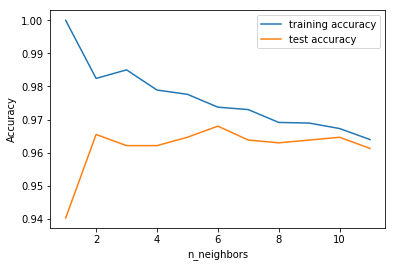

In [17]:
training_accuracy = []
test_accuracy1= []

neighbors_settings = range(1, 12)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # aca almacena el accuraci del training"
    training_accuracy.append(clf.score(X_train, y_train)) #
    # se almacena la "generalization accuracy"
    test_accuracy1.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
print(n_neighbors)


Según el gráfico para una cantidad de vecinos entre 4 y 10 podríamos tener valores para evitar underfitting u overfitting. De igual forma la naturaleza de los datos utilizados se presta para seleccionar una menor cantidad de vecinos y se pueden obtener predicciones con una precisión aun mayor a 90%.

## 3. Naive Bayes

Es utilizado normalmente en Datasets grandes. En este caso es de aproximadamente de 6000 elementos con 168 Atributos.

Primeramente se inicia con la carga de las Bibliotecas correspondientes.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Se realiza la separacion de cuales datos van a usarse como test y como de entrenamiento.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=52)

En este analisis se va a utilizar GaussianNB ya que estamos usando gran cantidad de datos. 

In [98]:
nbg = GaussianNB().fit(X_train, y_train)
print("************* Results *************")
print("Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(X_test, y_test)))

Training set score: 0.833
Test set score: 0.844


Durante la fase exploratoria de los resultados del entrenamiento se logró mejorar en 2% incrementando el valor de random_state a 52 despues de incrementos mas significativos al random_state se notó que el incremento permanecio practicamente si variar asi que dado las naturaleza de los datos y que se usó el Dataset completo podemos decir que el score es un valor aceptable.

## 4. Decision Trees

Los arboles de decisión son representaciones gráficas de posibles soluciones a una decisión basadas en ciertas condiciones, es uno de los algoritmos de aprendizaje supervisado más utilizados en machine learning y pueden realizar tareas de clasificación o regresión.

Este se base en la lógica de comparacion o condicionales (If/Else)

En el caso de tener un 100% esto quiere decir que el arbol va a tener solo hojas puras.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


Se realiza la separacion de cuales datos van a usarse como test y como de entrenamiento.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=13)

In [15]:
classifier = DecisionTreeClassifier(random_state=30)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=30, splitter='best')

In [16]:
print("************* Results *************")
print("Accuracy on training set: {:.3f}".format(classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.980


Esto indica que es un arbol puro esto debido al valor obtenido en el training set. Esto quiere decir que esta practicamente memorizando los datos de entrada ocasionando un overfit. 

In [17]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("************* Results *************")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.918
Accuracy on test set: 0.892


Limitando a solo 3 preguntas se logro disminuir el impacto de 'memorizar' y este ya no tendria hojas puramente.

In [18]:
tree = DecisionTreeClassifier(min_samples_split=15, random_state=0)
tree.fit(X_train, y_train)

print("************* Results *************")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.980



Se puede determinar el nivel de importancia de cada atributo con "tree feature importances" Pero como son tantos atributos prefiero no enlistarlos ni graficarlos.

In [27]:
#print("Feature importances:\n{}".format(tree.feature_importances_))

# Dos metodos deben ser diferentes de los que se analizaron en clase

https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de


combining predictions from several models averages out idiosyncratic errors and yield better overall predictions.

## 1. Bagging classifier or Bootstrap Aggregation

Bootstrap es una técnica de muestreo en la que seleccionamos observaciones "n" de una población de observaciones "n". Pero la selección es completamente aleatoria, es decir, cada observación se puede elegir de la población original, de modo que cada observación es igualmente probable que se seleccione en cada iteración del proceso de arranque. Una vez que se forman las muestras bootstrapped, se entrenan modelos separados con las muestras bootstrapped. En experimentos reales, las muestras bootstrapped se extraen del conjunto de entrenamiento, y los submodelos se prueban utilizando el conjunto de prueba. La predicción de salida final se combina en las proyecciones de todos los submodelos.

En los métodos de promediación, el principio de conducción es construir varios estimadores de forma independiente y luego promediar sus predicciones. En promedio, el estimador combinado suele ser mejor que cualquiera del estimador de base única porque se reduce su varianza

Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Se cargan las todas las librerias con el fin de evitar problemas durante la ejecución por motivo de que alguna no se haya ejecutado en los codigos anteriores. 


Iniciamos haciendo la lectura del dataset y limitandolo a 3500.

In [51]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier

data_read= pd.read_csv('musk_csv.csv')

df = pd.DataFrame(data_read)
column_drop = df.drop(['ID','conformation_name', 'molecule_name'], axis=1)

#column_drop.shape
modified = column_drop.head(3500)

Al ser Bagging un proceso iterativo no se utilizaron todos los datos con el fin de disminuir el tiempo de procesamiento, sin embargo se puede realizar el cambio en la variable modified.


In [52]:
X2 = modified.drop(columns=['class'])
Y2 = modified['class'].values

In [55]:
seed = 7

Se realiza el entrenamiento de los datos de manera inicial para tener un mejor criterio del impacto del numero de splits y poder ejecutar el entrenamiento incrementandolos.

In [57]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X2, Y2, cv=kfold)
print(results.mean())

0.7734285714285715


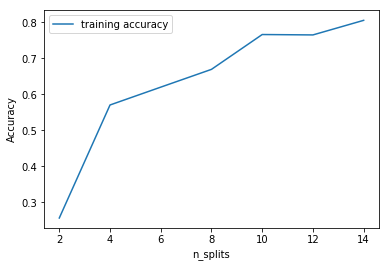

In [100]:
training_accuracy_Bag = []


neighbors_settings = range(2, 16, 2)
#n_neighbors = 1;
for n_neighbors in neighbors_settings: 
    kfold = model_selection.KFold(n_splits=n_neighbors, random_state=seed)
    cart = DecisionTreeClassifier()
    num_trees = 10
    model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
    results = model_selection.cross_val_score(model, X2, Y2, cv=kfold)
    final = results.mean()
    training_accuracy_Bag.append(final) #
#    print(results.mean())
    
plt.plot(neighbors_settings, training_accuracy_Bag, label="training accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_splits")
plt.legend()



En cuanto la cantidad de Splits si estos seguian incrementando el impacto en el precisión no iba a aunmentar enormemente sin embargo el tiempo de procesamiento si. Así que se concluye que el la precision es aceptable sin embargo para efectos practicos por la cantidad de datos se dejará asi pero si se puede optimizar más. 

## 2. AdaBoost classifier

Generalmente funciona al ponderar las instancias en el conjunto de datos por lo fácil o difícil que es clasificarlas, lo que permite que el algoritmo les preste más atención en la construcción de modelos posteriores.

Puede construir un modelo de AdaBoost para la clasificación utilizando la clase AdaBoostClassifier.

El siguiente ejemplo muestra la construcción de 30 árboles de decisión en secuencia utilizando el algoritmo AdaBoost.

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Es necesario cargar las librerias 

Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [77]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import AdaBoostClassifier

In [78]:
X3 = modified.drop(columns=['class'])
Y3 = modified['class'].values

In [76]:
seed = 7
num_trees = 20
kfold = model_selection.KFold(n_splits=20, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X3, Y3, cv=kfold)
print(results.mean())

0.8205714285714286


28


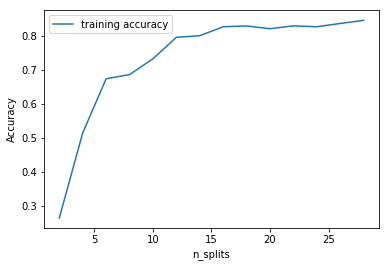

In [101]:
training_accuracy_AdaBoost = []

seed = 8
num_trees = 20
num_splits_iter = range(2, 30, 2)
for n_neighbors in num_splits_iter:
  
    kfold = model_selection.KFold(n_splits=n_neighbors, random_state=seed)
    model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

    results_AdaBoost = model_selection.cross_val_score(model, X3, Y3, cv=kfold)
    final = results_AdaBoost.mean()
    training_accuracy_AdaBoost.append(final)
    # se almacena la "generalization accuracy"
    
plt.plot(num_splits_iter, training_accuracy_AdaBoost, label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_splits")
plt.legend()
print(n_neighbors)
